# Полезные библиотеки для работы с данными

## Оповещение о выполнении скрипта через telepot

Во многих учебных примерах процесс подготовки данных и обучения моделей происходит достаточно быстро. На практике обучение или подготовка данных может занимать несколько часов, а иногд даже несколько дней! Хотелось бы добавить оповещения о завершении работы скрипта, чтобы можно было сразу оценить метрики и запустить новый эксперимент.

Мы можем добавить оповещения через телеграм при помощи библиотеки telepot.

In [ ]:
pip install telepot

     |████████████████████████████████| 73 kB 1.1 MB/s 
     |████████████████████████████████| 1.1 MB 10.8 MB/s 
     |████████████████████████████████| 271 kB 51.4 MB/s 
     |████████████████████████████████| 144 kB 57.0 MB/s 
     |████████████████████████████████| 94 kB 3.6 MB/s 
  Created wheel for telepot: filename=telepot-12.7-py3-none-any.whl size=57961 sha256=edaeced1718b30e67d8fe338b903e8327452957598576fe98fb77b2f39d058d5
  Stored in directory: /root/.cache/pip/wheels/59/4d/ea/8781198a69408b6c37d47d902d7bbe5541969eddf5290e6b2e
Successfully built telepot


In [ ]:
import telepot

In [ ]:
model_result_bot = telepot.Bot('Место для секретного ID бота')
model_result_bot

In [ ]:
model_result_bot.getUpdates()

In [ ]:
from time import sleep
def dummy_prepare_split():
  sleep(10)

def dummy_train_model():
  sleep(10)

def dummy_estimate_metrics():
  return {
      'R^2': 0.999,
      'MSE': 0.04,
      'MAE': 0.2,
  }

In [ ]:
MY_USER_ID = 9999999 # Нужно ввести свой из ячейки model_result_bot.getUpdates()

def dummy_experiment(my_bot):
  dummy_prepare_split()
  my_bot.sendMessage(MY_USER_ID, 'Сплит готов!')
  dummy_train_model()
  my_bot.sendMessage(MY_USER_ID, 'Я обучился!')
  current_metrics = dummy_estimate_metrics()
  my_bot.sendMessage(MY_USER_ID, f'Получили метрики {current_metrics}')

In [ ]:
try:
  dummy_experiment(model_result_bot)
except:
  model_result_bot.sendMessage(MY_USER_ID, 'Что-то пошло не так!')

## Добавляем прогресс-бар при помощи tqdm

Часто нужно не только знать, что скрипт уже по факту завершил свою работу, но и прогнозируемый срок выполнения и текущий этап. Это позволяет лучше распределять свое внимание и давать более точную оценку времени выполнения на каждую задачу.

В нашем текущем скрипте мы можем использовать cell-magic %%time (функции, предусмотренные jupyter-notebook или google collab), для того, чтобы узнать сколько заняло выполнение скрипта в ячейке. Предположим, у нас есть какой-то продолжительный процесс, который мы запускаем в цикле (например, [кросс-проверка](http://datascientist.one/cross-validation/), об этом подробнее в следующем курсе).

In [ ]:
from time import sleep
def dummy_crossval(n_iterations, time_to_spend):
  '''Функция, которая имитирует сложные вычисления'''
  for i in range(n_iterations):
    sleep(time_to_spend)

In [ ]:
%%time
dummy_crossval(5, 1)

CPU times: user 24.1 ms, sys: 6.34 ms, total: 30.5 ms
Wall time: 5.01 s


Но мы хотим видеть прогресс выполнения и время, оставшееся до завершения работы скрипта. Мы можем воспользоваться библиотекой tqdm для отображения прогресс-бара

In [ ]:
from tqdm import tqdm
def dummy_crossval(n_iterations, time_to_spend):
  '''Функция, которая имитирует сложные вычисления'''
  for i in tqdm(range(n_iterations)): # Добавляем наш range объект как параметр tqdm
    sleep(time_to_spend)

In [ ]:
dummy_crossval(5, 2)

100%|██████████| 5/5 [00:10<00:00,  2.00s/it]


Мы также можем добавить описание к нашему прогресс-бару

In [ ]:
from tqdm import tqdm
def dummy_crossval(n_iterations, time_to_spend):
  '''Функция, которая имитирует сложные вычисления'''
  for i in tqdm(
      range(n_iterations),
      desc='Сложнейшая кросс-проверка',
      ):
    sleep(time_to_spend)

In [ ]:
dummy_crossval(5, 2)

Сложнейшая кросс-проверка: 100%|██████████| 5/5 [00:10<00:00,  2.00s/it]


Но что произойдет, если в самом коде будет какой-либо стандартный вывод, либо будут появляться предупреждения?

In [ ]:
from tqdm import tqdm
def dummy_crossval_print(n_iterations, time_to_spend):
  '''Функция, которая имитирует сложные вычисления'''
  for i in tqdm(
      range(n_iterations),
      desc='Сложнейшая кросс-проверка',
      ):
    sleep(time_to_spend)
    print(i)

In [ ]:
dummy_crossval_print(5, 1)

Сложнейшая кросс-проверка:  20%|██        | 1/5 [00:01<00:04,  1.00s/it]

0


Сложнейшая кросс-проверка:  40%|████      | 2/5 [00:02<00:03,  1.00s/it]

1


Сложнейшая кросс-проверка:  60%|██████    | 3/5 [00:03<00:02,  1.00s/it]

2


Сложнейшая кросс-проверка:  80%|████████  | 4/5 [00:04<00:01,  1.00s/it]

3


Сложнейшая кросс-проверка: 100%|██████████| 5/5 [00:05<00:00,  1.00s/it]

4


Прогресс-бар вывелся несколько раз. В tqdm есть поддержка jupyter-notebook, которая позволяет выводить более красивый прогресс-бар. При такой реализации решается проблема построчного вывода прогресс-бара.

In [ ]:
from tqdm.notebook import tqdm
def dummy_crossval_print(n_iterations, time_to_spend):
  '''Функция, которая имитирует сложные вычисления'''
  for i in tqdm(
      range(n_iterations),
      desc='Сложнейшая кросс-проверка',
      ):
    sleep(time_to_spend)
    print(i)

In [ ]:
dummy_crossval_print(5, 1)

Сложнейшая кросс-проверка:   0%|          | 0/5 [00:00<?, ?it/s]

0
1
2
3
4


Еще одним плюсом такого прогресс-бара явялется цветовая индикация: <br>
Синий - скрипт выполняется; <br>
Зеленый - скрипт выполнен; <br>
Красный - скрипт завершен с ошибкой.

При работе с pandas редко используются циклы, чаще всего для сложных вычислений спользуется метод *apply*, который позволяет применять свои функции к сериям и датафреймам

In [ ]:
import pandas as pd
import numpy as np
df_random_normal = pd.DataFrame(
    {
        'values': np.random.normal(170, 10, size=10000000),
    }
)
df_random_normal.head(2)

,values
0,182.146032
1,180.121760


In [ ]:
df_random_normal.apply(lambda x: (x - 100) / (x / 100)**2).head(3)

,values
0,24.759802
1,24.695517
2,23.429717


Применить прогресс-бар для метода apply можно таким способом

In [ ]:
# Этот метод преобразует объекты в pandas для того, чтобы добавить
# прогресс бар
tqdm.pandas(desc='Сложный рассчет при помощи progress_apply')
df_random_normal.progress_apply(
    lambda x: (x - 100) / (x / 100)**2
).head(3)

Сложный рассчет при помощи progress_apply:   0%|          | 0/1 [00:00<?, ?it/s]

,values
0,24.759802
1,24.695517
2,23.429717


##Валидация и тестирование данных при помощи pandera

Как аналитика вас будет интересовать качество исходных данных. От качества исходных данных напрямую зависит качество наших выводов: "Garbage in = garbage out" ("Мусор на входе = мусор на выходе"). <br>
![garbage[1].jpg](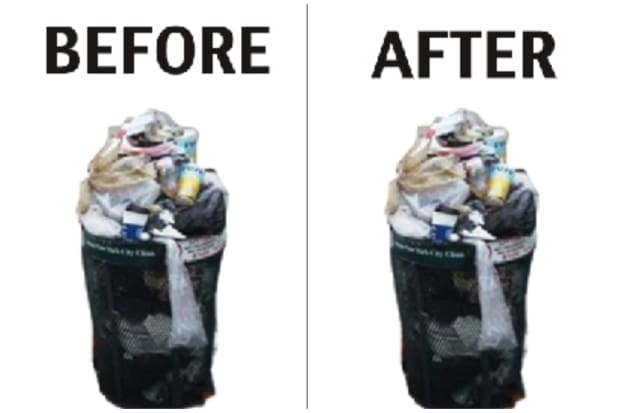)

В python есть возможность "из коробки" ввалидировать данные. Например, в самом простом варианте можно использовать оператор *assert*.

Пример с данными: [videogamesales](https://www.kaggle.com/gregorut/videogamesales)

In [ ]:
df_sales = pd.read_csv('vgsales.csv.zip', compression='zip')
df_sales

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002.0,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003.0,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008.0,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,16599,Know How 2,DS,2010.0,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [ ]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [ ]:
# assert выдаст AssertionError, если его условие будет ложным
assert df_sales['Rank'].isna().sum() == 0, 'Пропущены ранги' # Пройдет проверку
assert df_sales['Year'].isna().sum() == 0, 'Пропущен год' # Выдаст AssertionError

AssertionError: ignored

Однако для более сложных задач можно использовать специальные библиотеки для валидации данных, например pandera.

In [ ]:
pip install pandera

     |████████████████████████████████| 191 kB 6.3 MB/s 


In [ ]:
import pandera as pa

# Для валидации мы создаем схему для проверки датафрейма по типам значений

sales_types_scheme = pa.DataFrameSchema(
    {
        'Rank': pa.Column('int'),
        'Name': pa.Column('str'),
        'Platform': pa.Column('str'),
        'Year': pa.Column('int'), # Эта проверка выдаст ошибку
        'Genre': pa.Column('str'),
        'Publisher': pa.Column('str'), # Эта проверка тоже выдаст ошибку
        'NA_Sales': pa.Column('float'),
        'EU_Sales': pa.Column('float'),
        'JP_Sales': pa.Column('float'),
        'Other_Sales': pa.Column('float'),
        'Global_Sales': pa.Column('float'),
    },

)

# Вызываем метод validate для проверки исходного датафрейма
sales_types_scheme.validate(df_sales)

SchemaError: ignored

Обратите внимание, что в результате проверки мы получили не просто ошибку, но и информацию в каких строках есть недопустимые значения и их общее количество. В pandera есть помимо проверок на тип данных еще множество интересных проверок, которые позволяют убедиться в то, что наши данные корректны.

In [ ]:
# Добавим более сложные проверки для наших данных
sales_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_types_scheme = pa.DataFrameSchema(
    {
        'Rank': pa.Column(
            'int',
            pa.Check(lambda x: x <= x.shift(-1).fillna(x)), # Ранги идут в порядке возрастания
        ),
        'Name': pa.Column('str'),
        'Platform': pa.Column('str'),
        # 'Year': pa.Column('int'), # Эта проверка выдаст ошибку
        'Genre': pa.Column('str'),
        # 'Publisher': pa.Column('str'), # Эта проверка тоже выдаст ошибку
        'NA_Sales': pa.Column('float', pa.Check.ge(0)), # Значение больше или равно 0
        'EU_Sales': pa.Column('float', pa.Check.ge(0)),
        'JP_Sales': pa.Column('float', pa.Check.ge(0)),
        'Other_Sales': pa.Column('float', pa.Check.ge(0)),
        'Global_Sales': pa.Column('float', pa.Check.ge(0)),
    },
    checks = pa.Check( # Проверка на уровне датафрейма
        lambda x: x['Global_Sales'] == x[sales_names].sum(axis=1) # Проверка, что Global_Sales - сумма столбцов со всеми продажами
        # Спойлер: это не всегда так
    ),
)

# Вызываем метод validate для проверки исходного датафрейма
sales_types_scheme.validate(df_sales)

SchemaError: ignored

После того, как мы познакомились с тем, как проводить основные проверки, мы можем создать такую схему данных, которую хотим получить в результате препроцессинга.

In [ ]:
# Ожидаемая схема после препроцессинга
sales_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
sales_result_scheme = pa.DataFrameSchema(
    {
        'Rank': pa.Column(
            'int',
            pa.Check(lambda x: x <= x.shift(-1).fillna(x)), # Ранги идут в порядке возрастания
        ),
        'Name': pa.Column('category'), # Переведем эти колонки в категории
        'Platform': pa.Column('category'),
        'Year': pa.Column('int', pa.Check.in_range(1900, 2023)), # Год в пределах от 1900 года до 2023
        'Genre': pa.Column('category'),
        'Publisher': pa.Column('category'),
        'NA_Sales': pa.Column('float', pa.Check.ge(0)), # Значение больше или равно 0
        'EU_Sales': pa.Column('float', pa.Check.ge(0)),
        'JP_Sales': pa.Column('float', pa.Check.ge(0)),
        'Other_Sales': pa.Column('float', pa.Check.ge(0)),
        'Global_Sales': pa.Column('float', pa.Check.ge(0)),
    },
    checks = pa.Check(
        lambda x: x['Global_Sales'] == x[sales_names].sum(axis=1) # Проверка, что Global_Sales - сумма столбцов со всеми продажами

    ),
)

### Препроцессинг данных

Для дальнейшего анализа нам требуется подготовить данные. Этот этап называется препроцессингом. Мы выявили основные проблемы в нашем датасете:

1.   Неверные типы данных
2.   Пропущенные значения в Year и Publisher
3.   Общие продажи не равны сумме продажам по странам

In [ ]:
# Создадим отдельную функцию для препроцессинга

# При помощи этого декоратора мы проверяем данные на выходе из этой функции
@pa.check_output(sales_result_scheme)
def preprocess_data(raw_df, categroy_columns, integer_columns, dropna_subset):
    sales_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
    # Создадим копию датафрейма, чтобы не изменять сырой датафрейм
    df = raw_df.copy()
    df.dropna(subset=dropna_subset, inplace=True)
    df[categroy_columns] = df[categroy_columns].astype('category')
    df[integer_columns] = df[integer_columns].astype('int')

    # Преобразуем общие продажи в новую колонку
    df['Global_Sales'] = df[sales_names].sum(axis=1)
    return df

In [ ]:
preprocess_data(
    df_sales,
    ['Platform', 'Name','Genre', 'Publisher'],
    ['Year'],
    ['Year', 'Publisher'],
    )

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3,4,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
...,...,...,...,...,...,...,...,...,...,...,...
16593,16596,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,16597,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,16598,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.00
16596,16599,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01
